In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
hdf=pd.read_csv("HeartNew.csv")
hdf

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
1,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
2,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
3,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
4,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
299,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
300,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
301,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1


In [4]:
hdf.drop_duplicates(keep=False,inplace=True)
hdf

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
1,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
2,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
3,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
4,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
299,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
300,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
301,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1


In [6]:
hdf1=hdf.drop(['sex','cp','fbs','restecg','exang','slope','ca','thal','target'],axis=1)
hdf1

,age,trestbps,chol,thalach,oldpeak
0,29,130,204,202,0.0
1,34,118,182,174,0.0
2,34,118,210,192,0.7
3,35,138,183,182,1.4
4,35,122,192,174,0.0
...,...,...,...,...,...
298,71,110,265,130,0.0
299,71,112,149,125,1.6
300,74,120,269,121,0.2
301,76,140,197,116,1.1


## Correlation Matrix

In [7]:
# Correlation Matrix
corrMatrix=hdf1.corr()
corrMatrix

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.286967,0.200598,-0.391884,0.201989
trestbps,0.286967,1.000000,0.127368,-0.049362,0.195997
chol,0.200598,0.127368,1.000000,-0.000600,0.046159
thalach,-0.391884,-0.049362,-0.000600,1.000000,-0.340189
oldpeak,0.201989,0.195997,0.046159,-0.340189,1.000000


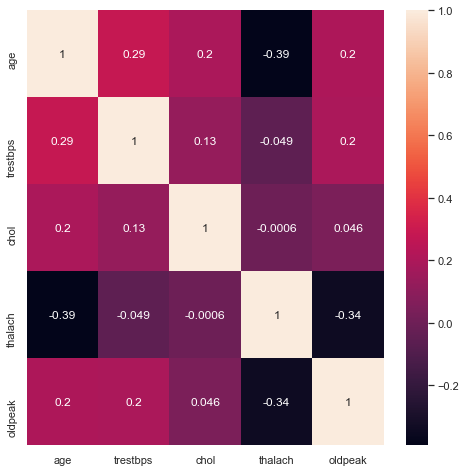

In [8]:
# Correlation Heatmap Matrix
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(corrMatrix,annot=True)
plt.show()

## Chi-Square test for association

In [9]:
# Contingency Table of slope and thal
contTable=pd.crosstab(index=hdf['slope'],columns=hdf['thal'])
contTable

thal,0,1,2,3
slope,,,,
0,0,3,8,10
1,1,13,56,70
2,1,2,100,37


In [17]:
# Chi-square test for independence of slope and thal
import scipy.stats as st
st.chi2_contingency(contTable)

(34.23409248836078,
 6.062157277737252e-06,
 6,
 array([[ 0.13953488,  1.25581395, 11.44186047,  8.1627907 ],
        [ 0.93023256,  8.37209302, 76.27906977, 54.41860465],
        [ 0.93023256,  8.37209302, 76.27906977, 54.41860465]]))

In [31]:
# Pvalue<0.05: Reject Ho i.e. There is association between slope and thal

In [18]:
contTable1=pd.crosstab(index=hdf['sex'],columns=hdf['cp'])
contTable1

cp,0,1,2,3
sex,,,,
0,39,18,35,4
1,104,32,50,19


In [13]:
# Chi-square test for independence of sex and cp
#st.chi2_contingency(contTable1)

In [19]:
contTable2=pd.crosstab(index=hdf['restecg'],columns=hdf['exang'])
contTable2

exang,0,1
restecg,,
0,93,54
1,107,43
2,2,2


In [20]:
# Chi-square test for independence of restecg and exang
st.chi2_contingency(contTable2)

(2.7270890422375564,
 0.2557526478015439,
 2,
 array([[ 98.65116279,  48.34883721],
        [100.66445183,  49.33554817],
        [  2.68438538,   1.31561462]]))

## Logistics Regression Model

In [21]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    int64  
 2   cp        301 non-null    int64  
 3   trestbps  301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    int64  
 6   restecg   301 non-null    int64  
 7   thalach   301 non-null    int64  
 8   exang     301 non-null    int64  
 9   oldpeak   301 non-null    float64
 10  slope     301 non-null    int64  
 11  ca        301 non-null    int64  
 12  thal      301 non-null    int64  
 13  target    301 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.3 KB


In [22]:
hdf.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [23]:
np.any(np.isnan(hdf))

False

In [24]:
np.all(np.isfinite(hdf))

True

In [25]:
def clean_dataset(hdf):
    assert isinstance(hdf, pd.DataFrame)
    hdf.dropna(inplace=True)
    indices_to_keep = ~hdf.isin([np.nan, np.inf, -np.inf]).any(1)
    return hdf[indices_to_keep].astype(np.int64)

In [26]:
hdf3=clean_dataset(hdf)
hdf3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,1,130,204,0,0,202,0,0,2,0,2,1
1,34,1,3,118,182,0,0,174,0,0,2,0,2,1
2,34,0,1,118,210,0,1,192,0,0,2,0,2,1
3,35,0,0,138,183,0,1,182,0,1,2,0,2,1
4,35,1,1,122,192,0,1,174,0,0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,71,0,2,110,265,1,0,130,0,0,2,1,2,1
299,71,0,0,112,149,0,1,125,0,1,1,0,2,1
300,74,0,1,120,269,0,0,121,1,0,2,1,2,1
301,76,0,2,140,197,0,2,116,0,1,1,0,2,1


In [27]:
x=hdf3.iloc[:,:-1]
y=hdf3.iloc[:,-1]
x,y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     29    1   1       130   204    0        0      202      0        0   
 1     34    1   3       118   182    0        0      174      0        0   
 2     34    0   1       118   210    0        1      192      0        0   
 3     35    0   0       138   183    0        1      182      0        1   
 4     35    1   1       122   192    0        1      174      0        0   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   71    0   2       110   265    1        0      130      0        0   
 299   71    0   0       112   149    0        1      125      0        1   
 300   74    0   1       120   269    0        0      121      1        0   
 301   76    0   2       140   197    0        2      116      0        1   
 302   77    1   0       125   304    0        0      162      1        0   
 
      slope  ca  thal  
 0        2   0     2  
 1        2   0     2  
 2

In [28]:
# Splitting of dataset as training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
x_train


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
178,57,1,0,130,131,0,1,115,1,1,1,1,3
299,71,0,0,112,149,0,1,125,0,1,1,0,2
250,63,1,0,140,187,0,0,144,1,4,2,2,3
29,42,1,0,140,226,0,1,178,0,0,2,0,2
199,59,1,0,135,234,0,1,161,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,60,1,0,145,282,0,0,142,1,2,1,2,3
201,59,1,1,140,221,0,1,164,1,0,2,0,2
257,64,1,3,170,227,0,0,155,0,0,1,0,3
211,59,1,3,134,204,0,1,162,0,0,2,2,2


In [29]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)
X_test

array([[-1.79949537e-01, -1.54281616e+00,  9.99371571e-01,
        -2.53905838e-01, -6.37549785e-01, -4.20084025e-01,
        -9.61438460e-01, -1.52016695e+00, -7.13746427e-01,
        -7.34410376e-01,  9.89928306e-01, -7.36712882e-01,
        -3.91214134e+00],
       [-1.07969722e+00, -1.54281616e+00, -9.27127843e-01,
         3.04640460e-01, -2.24617796e-01, -4.20084025e-01,
        -9.61438460e-01,  7.18937312e-02,  1.40105780e+00,
        -7.34410376e-01, -6.48573718e-01, -7.36712882e-01,
        -5.82659349e-01],
       [ 2.69924305e-01,  6.48165367e-01, -9.27127843e-01,
        -1.25928917e+00,  1.81939555e+00, -4.20084025e-01,
         9.45546915e-01, -3.15364272e-01,  1.40105780e+00,
         2.12383541e+00, -6.48573718e-01,  3.61492656e-01,
         1.08208165e+00],
       [ 3.82392766e-01,  6.48165367e-01, -9.27127843e-01,
        -1.03587066e+00,  1.46840336e+00, -4.20084025e-01,
         2.85253229e+00, -4.44450274e-01, -7.13746427e-01,
         3.07658401e+00, -2.28707574e

In [30]:
# Model on training dataset
from sklearn.linear_model import LogisticRegression
LRclassifier=LogisticRegression()

LRclassifier.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
# Predicted values
y_pred=LRclassifier.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [32]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred)

array([[19,  1],
       [ 6, 35]], dtype=int64)

## VIF

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
X=hdf3.iloc[:,:-1]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,29,1,1,130,204,0,0,202,0,0,2,0,2
1,34,1,3,118,182,0,0,174,0,0,2,0,2
2,34,0,1,118,210,0,1,192,0,0,2,0,2
3,35,0,0,138,183,0,1,182,0,1,2,0,2
4,35,1,1,122,192,0,1,174,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,71,0,2,110,265,1,0,130,0,0,2,1,2
299,71,0,0,112,149,0,1,125,0,1,1,0,2
300,74,0,1,120,269,0,0,121,1,0,2,1,2
301,76,0,2,140,197,0,2,116,0,1,1,0,2


In [35]:
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
print(vif)

          VIF
0   40.126760
1    3.483848
2    2.410986
3   59.274460
4   26.280600
5    1.272847
6    2.044293
7   42.517042
8    2.011018
9    2.455589
10   9.673335
11   1.932331
12  17.076282


## PCA

In [36]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_stan=scaler.fit_transform(X)
x_stan

array([[-2.83114178,  0.68431914,  0.03869438, ...,  0.98270763,
        -0.71568443, -0.51507351],
       [-2.27547298,  0.68431914,  1.97986244, ...,  0.98270763,
        -0.71568443, -0.51507351],
       [-2.27547298, -1.46130649,  0.03869438, ...,  0.98270763,
        -0.71568443, -0.51507351],
       ...,
       [ 2.16987745, -1.46130649,  0.03869438, ...,  0.98270763,
         0.29568183, -0.51507351],
       [ 2.39214497, -1.46130649,  1.00927841, ..., -0.6425396 ,
        -0.71568443, -0.51507351],
       [ 2.50327873,  0.68431914, -0.93188965, ...,  0.98270763,
         2.31841436, -0.51507351]])

In [37]:
from sklearn.decomposition import PCA
pca=PCA(n_components=13)
X_pca=pca.fit_transform(x_stan)
explained_variance=pca.explained_variance_ratio_
print(explained_variance)
D=pd.DataFrame(X_pca)
D

[0.21240678 0.11915247 0.09337065 0.09095423 0.07821009 0.0742157
 0.06642031 0.06078366 0.0547519  0.04768975 0.03991054 0.03198734
 0.03014657]


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-3.030176,-1.177934,-0.866163,-1.050852,1.472854,1.063079,0.148236,0.217380,1.573184,0.059720,0.109686,0.307686,0.040767
1,-3.070179,-0.920044,-1.521278,-0.334135,0.836504,0.934463,-0.829737,-0.056383,0.029303,-0.095111,1.119865,0.625814,-0.441452
2,-3.235661,-0.871633,0.553612,0.492562,0.375363,-0.223150,0.813037,0.972617,1.193357,-0.649279,0.435920,0.096023,-0.028158
3,-2.213047,-0.912654,0.354120,0.823900,0.426029,-0.315805,1.226190,0.347504,2.274161,-0.797226,-0.112136,0.155870,-0.598505
4,-2.664064,-1.696078,-0.557007,-0.126748,-0.028690,-0.075209,0.404481,0.089144,0.776709,0.343874,-0.139912,0.477170,-0.157219
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,-0.308831,2.529875,0.060747,-0.219189,-1.888889,1.115505,-0.265211,0.931561,-1.726259,-1.285010,0.072033,-0.507982,-0.843256
297,0.310772,-0.438535,0.717742,2.391565,-1.805665,-0.083566,-0.606473,-0.499906,-0.138626,-1.550868,-0.985641,-1.127510,0.030023
298,0.881456,1.173825,2.075361,0.012142,-1.247106,1.138823,-0.387829,-0.944474,-1.066639,-0.582645,1.224390,-0.798563,-0.315942
299,0.260725,0.953409,0.265424,3.151209,-1.896358,-2.178371,0.009831,-1.185229,-0.945303,-0.249237,-0.278626,-0.456067,0.056964


In [38]:
corrMatrix=D.corr()
corrMatrix

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000e+00,-5.179183e-16,1.128234e-16,2.694503e-17,-9.157525e-17,1.432708e-16,-2.818693e-17,3.895358e-17,4.867302e-17,-4.961538e-17,9.183086e-17,2.161657e-16,9.218718e-17
1,-5.179183e-16,1.000000e+00,-2.372533e-16,-8.503388e-17,1.587125e-16,1.387902e-16,6.378644e-18,1.386912e-16,1.189071e-16,4.290829e-17,6.912169e-17,3.520372e-16,-1.041484e-16
2,1.128234e-16,-2.372533e-16,1.000000e+00,9.482753e-17,4.648275e-17,-9.747951e-17,3.177703e-16,2.056338e-16,-1.944427e-17,-7.568375e-17,-5.716846e-16,4.236394e-16,-4.663293e-16
3,2.694503e-17,-8.503388e-17,9.482753e-17,1.000000e+00,-1.412885e-16,2.106546e-16,3.475165e-16,-1.946102e-16,5.950467e-17,0.000000e+00,-3.861526e-17,1.220360e-16,-2.145681e-16
4,-9.157525e-17,1.587125e-16,4.648275e-17,-1.412885e-16,1.000000e+00,4.543400e-17,-2.228101e-16,-3.086291e-17,-1.044928e-16,-1.124273e-16,1.310222e-16,7.941600e-17,-1.110206e-16
5,1.432708e-16,1.387902e-16,-9.747951e-17,2.106546e-16,4.543400e-17,1.000000e+00,7.112376e-17,-2.078376e-16,-1.884978e-16,2.723178e-16,-1.433644e-16,1.583917e-16,3.269114e-16
6,-2.818693e-17,6.378644e-18,3.177703e-16,3.475165e-16,-2.228101e-16,7.112376e-17,1.000000e+00,-3.898260e-16,-2.305401e-17,-1.209898e-17,-2.799431e-16,2.117480e-16,-2.878636e-16
7,3.895358e-17,1.386912e-16,2.056338e-16,-1.946102e-16,-3.086291e-17,-2.078376e-16,-3.898260e-16,1.000000e+00,2.591898e-16,1.043421e-16,-1.443015e-16,-4.697219e-17,4.039817e-16
8,4.867302e-17,1.189071e-16,-1.944427e-17,5.950467e-17,-1.044928e-16,-1.884978e-16,-2.305401e-17,2.591898e-16,1.000000e+00,1.749036e-17,1.656989e-16,6.237342e-17,2.915669e-16
9,-4.961538e-17,4.290829e-17,-7.568375e-17,0.000000e+00,-1.124273e-16,2.723178e-16,-1.209898e-17,1.043421e-16,1.749036e-17,1.000000e+00,1.385236e-16,-7.264384e-18,2.993153e-17


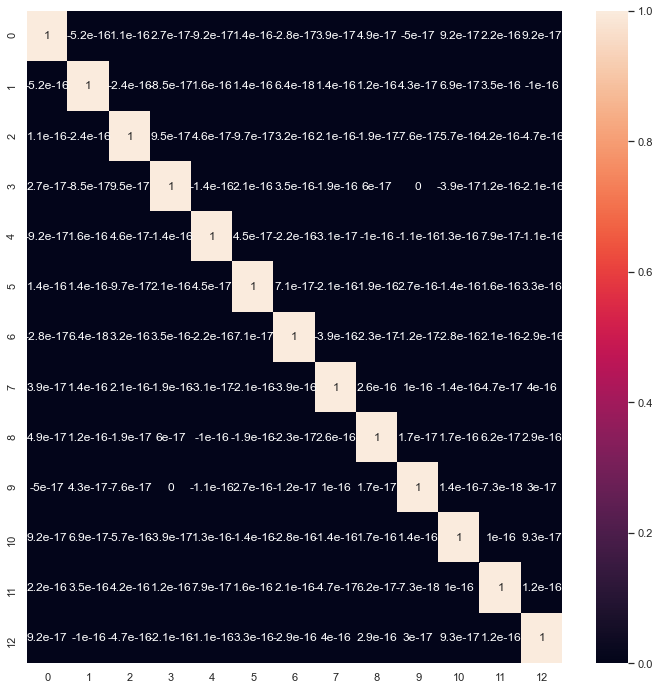

In [39]:
# Correlation Heatmap Matrix
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(corrMatrix,annot=True)
plt.show()

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train=pca.fit_transform(x)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_
total_explained_variation=explained_variance.sum()*100
total_explained_variation

## Scree Plot

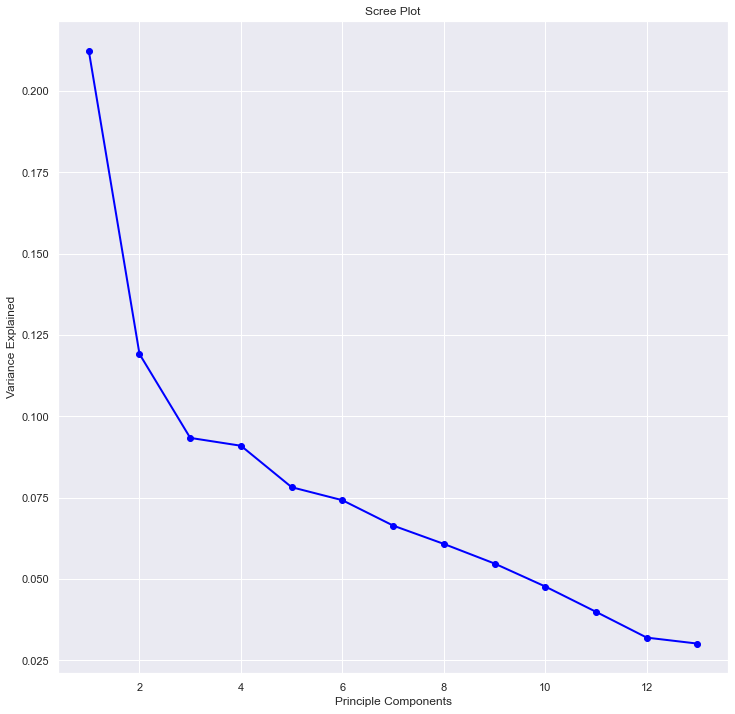

In [40]:
PCA=[1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.plot(PCA,explained_variance,'o-',linewidth=2,color='blue')
plt.title('Scree Plot')
plt.xlabel('Principle Components')
plt.ylabel('Variance Explained')
plt.show()